# **Shallow Neural Network**

In [2]:
# Selecting the required Keras and TensorFlow version
!pip install q keras==2.3.1
%tensorflow_version 1.5.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5.1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [3]:
# Importing relevant packages
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Size of MNIST training set = %d." % len(X_train))
print("Size of MNIST test set = %d" % len(X_test))

11493376/11490434 [==============================] - 1s 0us/step
Size of MNIST training set = 60000.
Size of MNIST test set = 10000


In [5]:
# Scaling each pixel to the range [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [6]:
# Encoding the labels into integers
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
# Defining the Model Architecture
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
# Training the Model
history = model.fit(X_train, y_train, batch_size=128, epochs=12, validation_data=(X_test, y_test), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.2720 - accuracy: 0.9202 - val_loss: 0.1412 - val_accuracy: 0.9570
Epoch 2/12
60000/60000 [==============================] - 2s 30us/step - loss: 0.1175 - accuracy: 0.9650 - val_loss: 0.0990 - val_accuracy: 0.9696
Epoch 3/12
60000/60000 [==============================] - 2s 30us/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.0824 - val_accuracy: 0.9755
Epoch 4/12
60000/60000 [==============================] - 2s 30us/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 5/12
60000/60000 [==============================] - 2s 30us/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0662 - val_accuracy: 0.9804
Epoch 6/12
60000/60000 [==============================] - 2s 30us/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0701 - val_accuracy: 0.9783
Epoch 7/12
60000/60000 [==============================] - 2s 30us/s

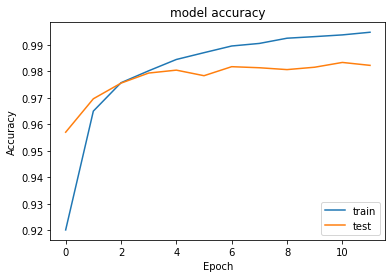

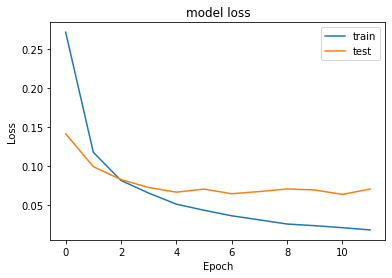

In [10]:
# summarizing the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarizing the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
# Computing the classification perfomance on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

Test loss: 0.07019497856066446
Test accuracy: 98.2200026512146


In [12]:
# Saving the trained model
model.save('shallow_model.h5')